### 9.1 图像增广 image augmentation

In [2]:
%matplotlib inline
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import d2lzh_pytorch as d2l

In [3]:
device = torch.device('cuda' if torch.cuda.is_available()
                      else 'cpu')

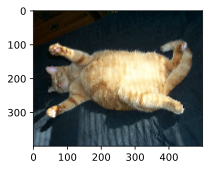

In [4]:
d2l.set_figsize()
img = Image.open('img/cat1.jpg')
d2l.plt.imshow(img)

In [12]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, 
                               figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [13]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

##### 翻转和裁剪

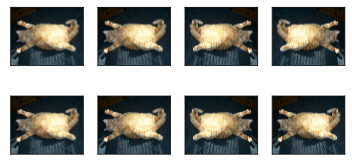

In [14]:
apply(img, 
      torchvision.transforms.RandomHorizontalFlip())

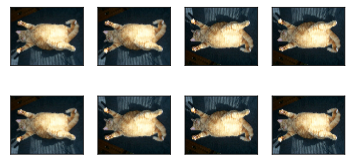

In [16]:
apply(img,
      torchvision.transforms.RandomVerticalFlip())

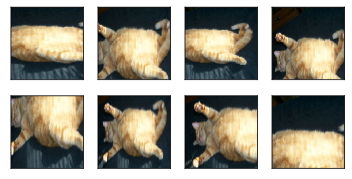

In [17]:
shape_aug = torchvision.transforms.RandomResizedCrop(
        200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

##### 变化颜色
* 可以从4个方面改变图像的颜色：
    - 亮度，brightness
    - 对比度，contrast
    - 饱和度，saturation
    - 色调，hue

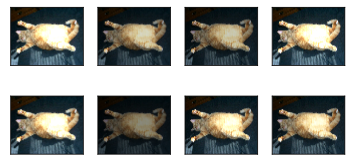

In [18]:
apply(img, 
      torchvision.transforms.ColorJitter(brightness=0.5))

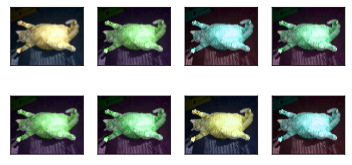

In [19]:
apply(img, 
      torchvision.transforms.ColorJitter(hue=0.5))

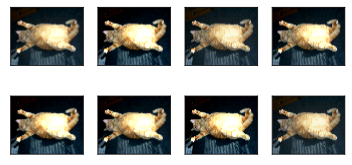

In [20]:
apply(img, 
      torchvision.transforms.ColorJitter(contrast=0.5))

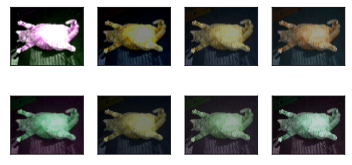

In [23]:
color_aug = torchvision.transforms.ColorJitter(
          brightness=0.5, contrast=0.5, 
          saturation=0.5, hue=0.5)
apply(img, color_aug)

##### 叠加多个图像增广方法

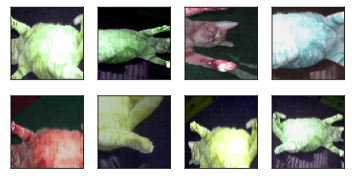

In [24]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    color_aug, shape_aug
])
apply(img, augs)

##### 使用图像增广训练模型

In [27]:
data_dir = '~/Datasets/CIFAR'
all_images = torchvision.datasets.CIFAR10(train=True, 
                root=data_dir, download=True)

Files already downloaded and verified


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e321550>,
      dtype=object)

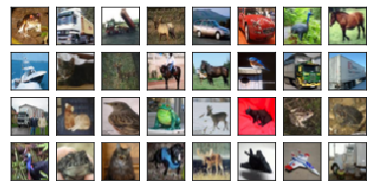

In [28]:
show_images([all_images[i][0] for i in range(32)], 
            4, 8, scale=0.8)